In [43]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [8]:
os.listdir('data')

['happy images', 'sad images']

In [9]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [10]:
gpus

[]

In [11]:
len(gpus)

0

In [13]:
import cv2
import imghdr

In [14]:
data_dir='data'

In [15]:
image_exts=['jpeg','jpg','png','bmp']

In [20]:
os.listdir(data_dir)

['happy images', 'sad images']

In [39]:
image=cv2.imread(os.path.join('data','happy images','_happy_jumping_on_beach-40815.jpg'))

In [41]:
image.shape

(213, 320, 3)

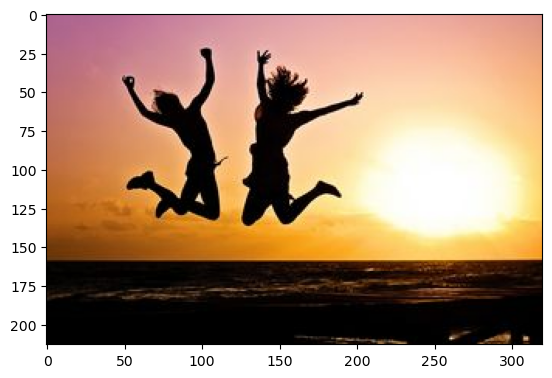

In [47]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in image_ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))

Image not in image_ext listdata\happy images\150910642-group-of-multi-cultural-friends-enjoying-outdoor-summer-garden-party.jpg
Image not in image_ext listdata\happy images\2560px-Happy_People.jpg
Image not in image_ext listdata\happy images\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in image_ext listdata\happy images\cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image not in image_ext listdata\happy images\guilherme-stecanella-375176-unsplash.jpg
Image not in image_ext listdata\happy images\happiness_thumbnail.jpg
Image not in image_ext listdata\happy images\happy-group-young-people-cheerful-260nw-1563846544.jpg
Image not in image_ext listdata\happy images\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in image_ext listdata\happy images\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in image_ext listdata\happy images\young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in image_ext listdata\sad images\168745

In [48]:
import numpy as np

In [49]:
tf.keras.utils.image_dataset_from_directory??

In [50]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 162 files belonging to 2 classes.


In [51]:
data_iterator=data.as_numpy_iterator()

In [72]:
batch=data_iterator.next()

In [73]:
batch[0].shape

(32, 256, 256, 3)

In [74]:
# class 1=sad ppl
#class 0=happy ppl
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

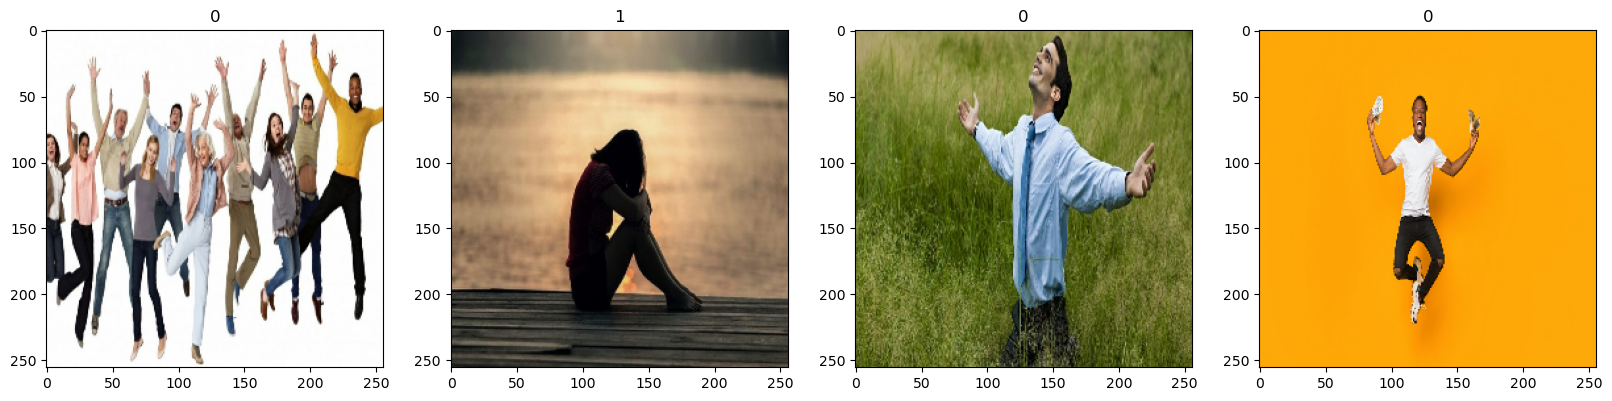

In [75]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [76]:
data=data.map(lambda x,y : (x/255,y))

In [77]:
scaled_iterator=data.as_numpy_iterator()

In [78]:
batch=scaled_iterator.next()

In [80]:
batch[0].max()

1.0

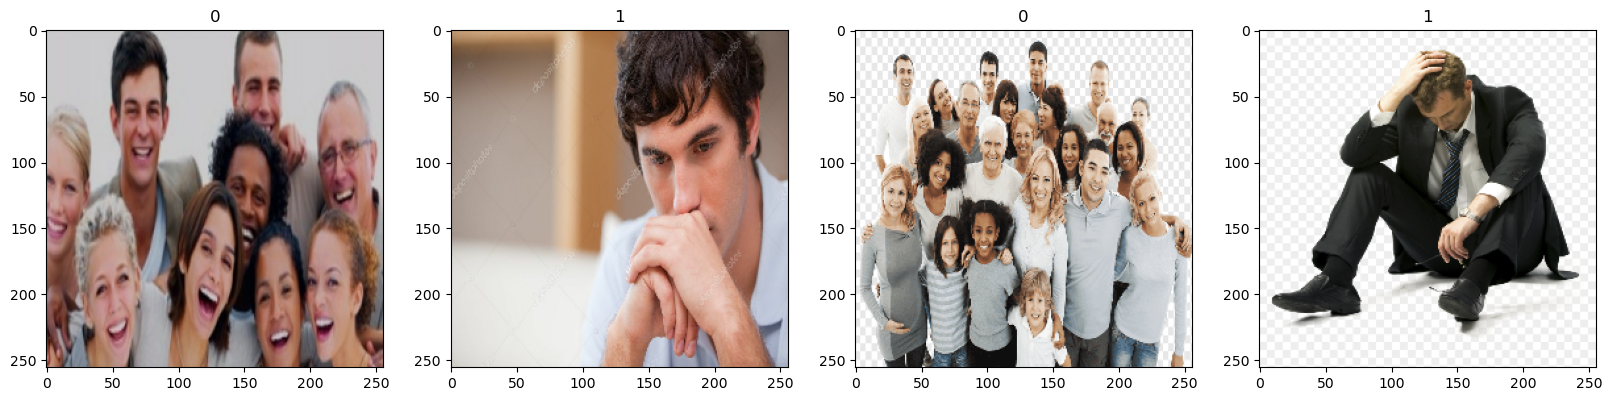

In [82]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [83]:
len(data)

6

In [90]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [95]:
train_size+val_size+test_size

6

In [96]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [99]:
len(train),len(val),len(test)

(4, 1, 1)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [101]:
model=Sequential()

In [102]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [105]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [108]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
4/4 [==============================] - 5s 849ms/step - loss: 1.1140 - accuracy: 0.4844 - val_loss: 0.6243 - val_accuracy: 0.5938
Epoch 2/20
4/4 [==============================] - 4s 766ms/step - loss: 0.6337 - accuracy: 0.5547 - val_loss: 0.5988 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 4s 750ms/step - loss: 0.6077 - accuracy: 0.6406 - val_loss: 0.5553 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 4s 752ms/step - loss: 0.5511 - accuracy: 0.6406 - val_loss: 0.5346 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 4s 807ms/step - loss: 0.4620 - accuracy: 0.8828 - val_loss: 0.3483 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 4s 761ms/step - loss: 0.3963 - accuracy: 0.8281 - val_loss: 0.2865 - val_accuracy: 0.9688
Epoch 7/20
4/4 [==============================] - 4s 751ms/step - loss: 0.3036 - accuracy: 0.9062 - val_loss: 0.4538 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

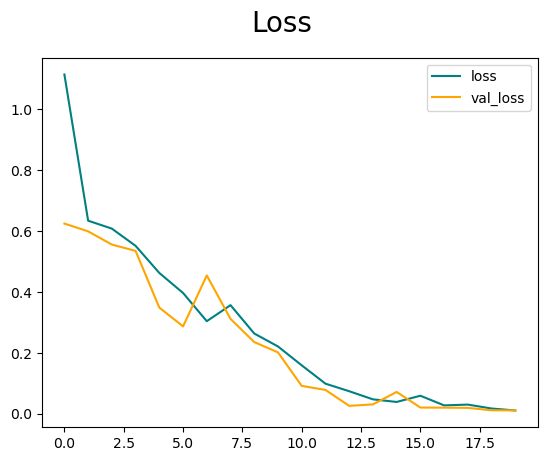

In [113]:
fig=plt.figure()
plt.plot(hist.history['loss'],label='loss',color='teal')
plt.plot(hist.history['val_loss'],label='val_loss',color='orange')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

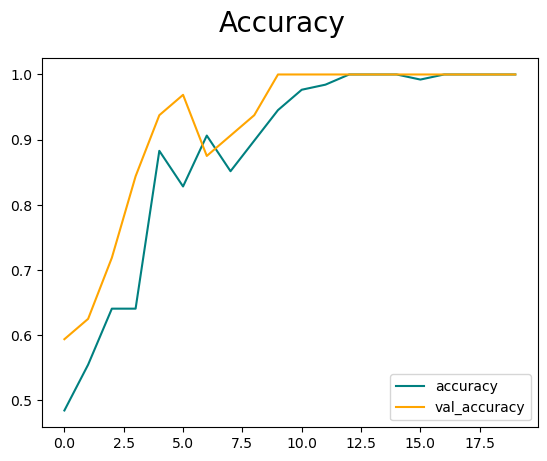

In [241]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],label='accuracy',color='teal')
plt.plot(hist.history['val_accuracy'],label='val_accuracy',color='orange')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

In [116]:
from tensorflow.keras.metrics import Accuracy,Recall,Precision

In [117]:
acc=Accuracy()
pre=Precision()
re=Recall()

In [118]:
len(test)

1

In [119]:
for batch in test.as_numpy_iterator():
    x,y=batch
    ypredict=model.predict(x)
    pre.update_state(y,ypredict)
    acc.update_state(y,ypredict)
    re.update_state(y,ypredict)

1/1 [==============================] - 2s 2s/step


In [122]:
print(f'Precision:{pre.result()} | Accuracy:{acc.result()} | Recall:{re.result()}')

Precision:1.0 | Accuracy:0.0 | Recall:1.0


# test time



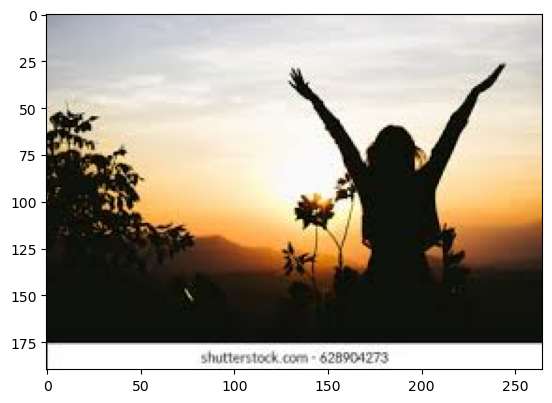

In [249]:
img=cv2.imread('happyimage.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [250]:
resize=tf.image.resize(img,(256,256))

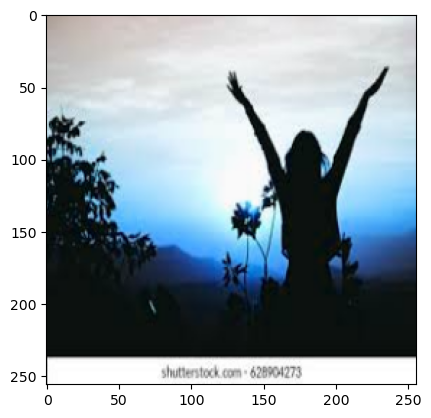

In [256]:
img=cv2.imread('happyimage.jpg')
plt.imshow(resize.numpy().astype(int))
plt.show()

In [257]:
resize.shape

TensorShape([256, 256, 3])

In [258]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [259]:
ypred=model.predict(np.expand_dims(resize/255,0))
ypred[0]

1/1 [==============================] - 0s 24ms/step


array([0.00568251], dtype=float32)

In [260]:
if ypred<0.5:
    print("Predicted class is Happy")
else:
    print("Predicted class is Sad")

Predicted class is Happy


In [261]:
from tensorflow.keras.models import load_model

In [263]:
model.save('happysad.h5')